In [102]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from joblib import dump, load

# Index
* [Training](#Training)
    * [Grid Search](#Grid-Search)
    * [Support Vector Regression](#Support-Vector-Regression)
    * [Gradient Boosting Regressor](#Gradient-Boosting-Regressor)
    * [Saving Model](#Saving-Model)
* [Testing](#Testing)

# Training
[Index](#Index)

[`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [89]:
dataframeML=pd.read_csv('/tf/ML-project/data/processedDataframe.csv')

In [90]:
X, y = dataframeML.drop(columns=["Category"]), dataframeML["Data.Fat.Total Lipid"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

## Grid Search
[Index](#Index)

![](https://www.mathworks.com/discovery/cross-validation/_jcr_content/mainParsys/image.adapt.full.medium.jpg/1706180466423.jpg)

[`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
[`putting_together`](https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html)

In [91]:
def findBestHyperparameters(model,param_grid):
  # Define a pipeline to search for the best combination of PCA truncation
  # and classifier regularization.
  pca = PCA()
  # Define a Standard Scaler to normalize inputs
  scaler = StandardScaler()

  pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("model", model)])

  search = GridSearchCV(pipe, param_grid, n_jobs=2, verbose=3)
  search.fit(X_train, y_train)
  print("Best parameter (CV score=%0.3f):" % search.best_score_)
  print(search.best_params_)
  return search.best_estimator_

## Gradient Boosting Regressor
[Index](#Index)

[`GradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

In [92]:
if False:
    model = GradientBoostingRegressor(random_state=0)
    param_grid = {
        "pca__n_components": [5, 15, 30],
    }
    
    search = findBestHyperparameters(model,param_grid)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameter (CV score=0.968):
{'pca__n_components': 30}


## Support Vector Regression
[Index](#Index)

[`SVR`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

In [93]:
model = SVR(epsilon=0.2)
param_grid = {
    "pca__n_components": [5, 15, 30],
    "model__C": [0.1, 1, 10, 100],
    "model__gamma": [0.001, 0.01, 0.1, 1]
}

search = findBestHyperparameters(model,param_grid)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 2/5] END ...............pca__n_components=5;, score=0.896 total time=   1.5s
[CV 4/5] END ...............pca__n_components=5;, score=0.891 total time=   1.4s
[CV 5/5] END ...............pca__n_components=5;, score=0.909 total time=   1.4s
[CV 2/5] END ..............pca__n_components=15;, score=0.960 total time=   3.9s
[CV 4/5] END ..............pca__n_components=15;, score=0.956 total time=   3.8s
[CV 1/5] END ..............pca__n_components=30;, score=0.970 total time=   7.6s
[CV 3/5] END ..............pca__n_components=30;, score=0.975 total time=   7.7s
[CV 5/5] END ..............pca__n_components=30;, score=0.968 total time=   6.5s
[CV 2/5] END model__C=0.1, model__gamma=0.001, pca__n_components=5;, score=-0.083 total time=   3.6s
[CV 4/5] END model__C=0.1, model__gamma=0.001, pca__n_components=5;, score=-0.062 total time=   2.0s
[CV 5/5] END model__C=0.1, model__gamma=0.001, pca__n_components=5;, score=-0.072 total 

## Saving Model
[Index](#Index)

[`model_persistence`](https://scikit-learn.org/stable/model_persistence.html)

In [109]:
dump(search, '../models/fatModel.joblib')

['../models/fatModel.joblib']

# Testing
[Index](#Index)

In [107]:
y_pred = search.predict(X_test)
print(f"mean absolute error: {mean_absolute_error(y_test, y_pred)}")
print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")

mean absolute error: 0.7133861952318588
mean squared error: 8.871414268982882


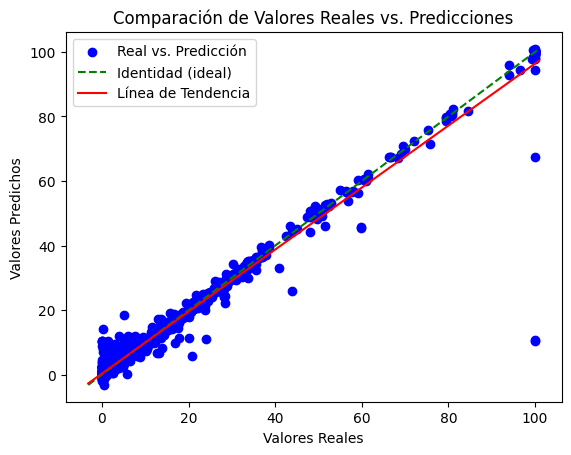

In [108]:
# Scatter plot de los valores reales vs. predicciones
plt.scatter(y_test, y_pred, color='blue', label='Real vs. Predicción')

# Línea de identidad (pendiente 1, intercepto 0)
x = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), 100)
plt.plot(x, x, color='green', linestyle='--', label='Identidad (ideal)')

# Calcular la regresión lineal entre y_test e y_pred para la línea de tendencia
coef = np.polyfit(y_test,y_pred,1)
poly1d_fn = np.poly1d(coef)
plt.plot(x, poly1d_fn(x), color='red', label='Línea de Tendencia')

# Etiquetas y leyenda
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación de Valores Reales vs. Predicciones')
plt.legend()
plt.show()